2025-11-30 20:11:41.084650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 513 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


2025-11-30 20:11:45.203901: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-30 20:11:45.204505: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-30 20:11:45.204525: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-30 20:11:45.205951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-30 20:11:45.206001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-11-30 20:11:48.655496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-11-30 20:11:50.648596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-11-30 20:11:50.847901: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


17/17 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.6413 - fossil_recall: 0.4438

2025-11-30 20:12:01.584142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-11-30 20:12:02.098564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 16s 755ms/step - loss: 0.6753 - accuracy: 0.6413 - fossil_recall: 0.4438 - val_loss: 0.5787 - val_accuracy: 0.8000 - val_fossil_recall: 1.0000
Epoch 2/10
17/17 [==============================] - 11s 586ms/step - loss: 0.4770 - accuracy: 0.7797 - fossil_recall: 0.6989 - val_loss: 0.4620 - val_accuracy: 0.8250 - val_fossil_recall: 1.0000
Epoch 3/10
17/17 [==============================] - 10s 576ms/step - loss: 0.4357 - accuracy: 0.8207 - fossil_recall: 0.8337 - val_loss: 0.3925 - val_accuracy: 0.8500 - val_fossil_recall: 0.7143
Epoch 4/10
17/17 [==============================] - 10s 591ms/step - loss: 0.3710 - accuracy: 0.8460 - fossil_recall: 0.9225 - val_loss: 0.3241 - val_accuracy: 0.9250 - val_fossil_recall: 0.9583
Epoch 5/10
17/17 [==============================] - 11s 605ms/step - loss: 0.3279 - accuracy: 0.8791 - fossil_recall: 0.8400 - val_loss: 0.2971 - val_accuracy: 0.9250 - val_fossil_recall: 0.8545
Epoch 6/10
17/17 [==================

2025-11-30 20:13:42.167275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step - loss: 0.2370 - accuracy: 0.9259 - fossil_recall: 0.8889
[0.2370009571313858, 0.9259259104728699, 0.8888888955116272]


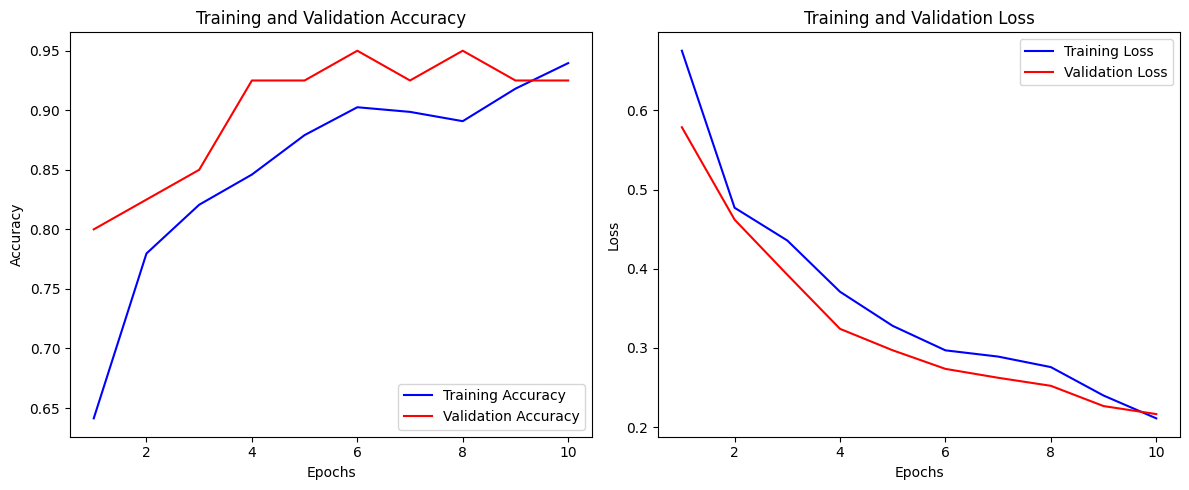

2025-11-30 20:13:44.560362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-11-30 20:13:45.132024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


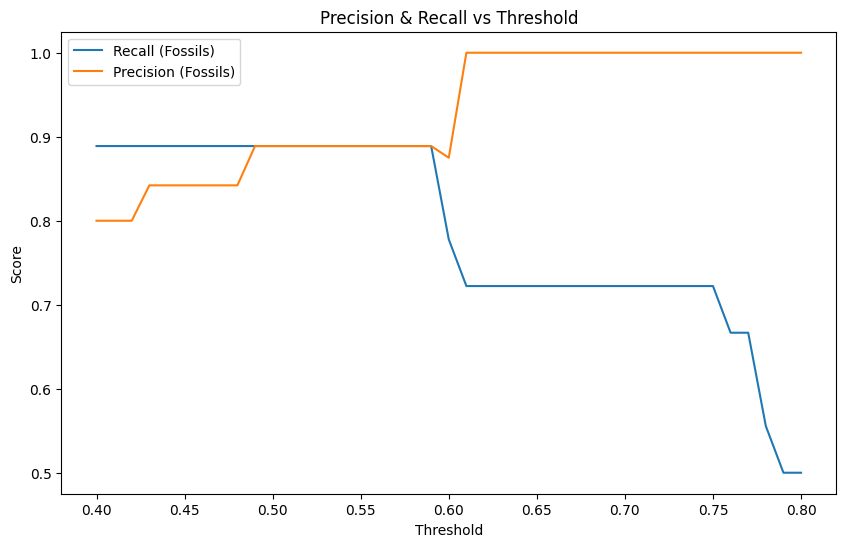

In [1]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import os

# Training, Validation, and Test Sets
train_dir = "Dino-Classify/fossil-classifier/data/processed/Split_Data_Full/train"
val_dir = "Dino-Classify/fossil-classifier/data/processed/Split_Data_Full/valid"
test_dir = "Dino-Classify/fossil-classifier/data/processed/Split_Data_Full/test"

# Pre-Processing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,                
    target_size=(299, 299),
    batch_size=54,
    class_mode='binary',
    shuffle=False             
)

# Inception Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Defining Recall (Thanks, Adrian)
def fossil_recall(y_true, y_pred):
    y_pred_bin = tf.cast(y_pred > 0.65, tf.float32)

    # fossils, positive class = 0
    true_positives = tf.reduce_sum(tf.cast((y_true == 0) & (y_pred_bin == 0), tf.float32))
    false_negatives = tf.reduce_sum(tf.cast((y_true == 0) & (y_pred_bin == 1), tf.float32))

    return true_positives / (true_positives + false_negatives + 1e-7)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', fossil_recall])

# Training Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

test_res = model.evaluate(test_generator)
print(test_res)

# Following Adrian's Lead
# Visualize Performance 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# More Plots!
y_pred_probs = model.predict(test_generator, steps=len(test_generator)).ravel()

y_true = test_generator.classes  # these are already integers (0 or 1)

thresholds = np.linspace(0.2, 0.6, 41)
recalls = []
precisions = []

for t in thresholds:
    preds = (y_pred_probs > t).astype(int)
    
    TP = np.sum((y_true == 0) & (preds == 0))  # fossils predicted correctly
    FP = np.sum((y_true == 1) & (preds == 0))  # rocks predicted as fossils
    FN = np.sum((y_true == 0) & (preds == 1))  # fossils missed
    
    recall = TP / (TP + FN + 1e-7)
    precision = TP / (TP + FP + 1e-7)
    
    recalls.append(recall)
    precisions.append(precision)

plt.figure(figsize=(10, 6))
plt.plot(1-thresholds, recalls, label="Recall (Fossils)")
plt.plot(1-thresholds, precisions, label="Precision (Fossils)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.show()


In [7]:

sum((y_true==(y_pred_probs>0.5)))

50

In [9]:
sum((y_true==0) & (y_pred_probs<=0.5))

16

In [12]:
sum(y_pred_probs<=0.5)

18